In [2]:
import csv
f=open('seoul.csv')
data=csv.reader(f)
header=next(data)
print(header)
f.close()


['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [16]:
import csv
f=open('seoul.csv')
data=csv.reader(f)
header=next(data)

max_temp=-999
max_date=''

for row in data:
    if row[-1]=='':
        row[-1]=-999
    row[-1]=float(row[-1])
    if max_temp<row[-1]:
        max_date=row[0]
        max_temp=row[-1]


f.close()
print('기상 관측 이래 서울의 최고 기온이 가장 높았던 날은',max_date,'로',max_temp,'도 였습니다.')

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도 였습니다.


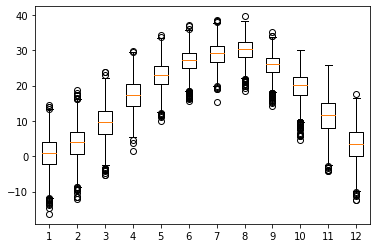

In [17]:
import matplotlib.pyplot as plt 
import csv
f=open('seoul.csv')
data=csv.reader(f)
next(data)

month=[[],[],[],[],[],[],[],[],[],[],[],[]]

for row in data:
    if row[-1]!='':
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))

plt.boxplot(month)
plt.show()


[5, 25, 38, 77, 97, 232, 336, 494, 571, 695, 699, 718, 727, 762, 816, 848, 869, 924, 925, 972]


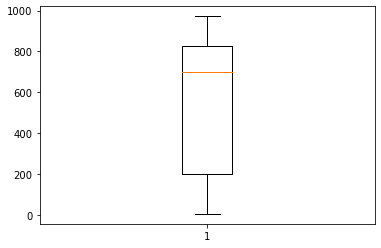

In [26]:
import matplotlib.pyplot as plt
import random
result=[]
for i in range(20):
    result.append(random.randint(1,1000))
print(sorted(result))

plt.boxplot(result)
plt.show()

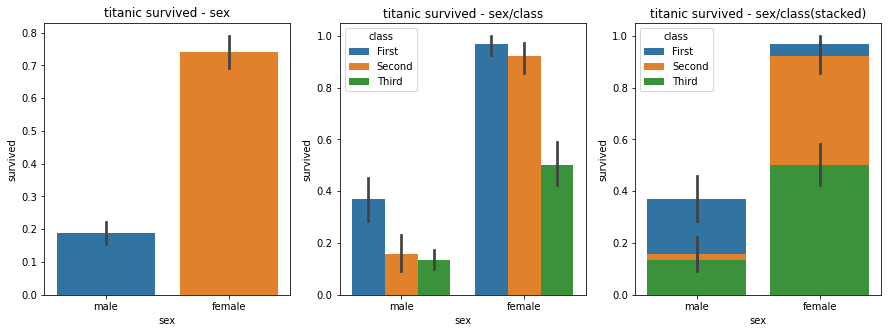

In [29]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)

sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)

sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')
plt.show()

In [30]:
import folium

seoul_map=folium.Map(location=[37.55,126.98],zoom_start=12)

seoul_map.save('./seoul.html')

In [31]:
seoul_map2=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                     zoom_start=12) #산악지형이 잘 보임
seoul_map3=folium.Map(location=[37.55,126.98],tiles='Stamen Toner',
                     zoom_start=12)#도로가 잘 보임

seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [39]:
import pandas as pd
import folium

df=pd.read_excel('./서울지역 대학교 위치.xlsx')

seoul_map=folium.Map(location=[37.55,126.98],titles='Stamen Terrain',
                     zoom_start=12)

for name,lat,lng in zip(df.index,df.위도,df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)


seoul_map.save('./seoul_colleges.html')

In [45]:
import pandas as pd
import folium

df=pd.read_excel('./서울지역 대학교 위치.xlsx')

seoul_map=folium.Map(location=[37.55,126.98],titles='Stamen Terrain',
                     zoom_start=12)

for name,lat,lng in zip(df.학교,df.위도,df.경도):
    iframe =folium.IFrame(name,width=300,height=100)
    popup=folium.Popup(iframe,max_width=600)
    folium.CircleMarker([lat,lng],
                        radius=10,
                        color='black',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name
    ).add_to(seoul_map)


seoul_map.save('./seoul_colleges2.html')

In [54]:
import pandas as pd
import folium
import json

file_path='./경기도인구데이터.xlsx'
df=pd.read_excel(file_path,index_col='구분')
df.columns=df.columns.map(str)

geo_path='./경기도행정구역경계.json'
try:
    geo_data=json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data=json.load(open(geo_path,encoding='utf-8-sig'))
    
g_map=folium.Map(location=[37.5502,126.982],
                tiles='Stamen Terrain',zoom_start=9)
year='2017'

folium.Choropleth(geo_data=geo_data,
                 data=df[year],
                 columns=[df.index,df[year]],
                 fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.3,
                 threshold_scale=[10000,100000,300000,500000,700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)
g_map.save('./gyonggi_population_'+year+'.html')
g_map


In [53]:
import pandas as pd
import folium

df=pd.read_excel('./서울지역 대학교 위치.xlsx')

seoul_map=folium.Map(location=[37.55,126.98],titles='Stamen Terrain',
                     zoom_start=12)

for name,lat,lng in zip(df.학교,df.위도,df.경도):
    iframe =folium.IFrame(name,width=200,height=100)
    popup=folium.Popup(iframe,max_width=800)
    folium.CircleMarker([lat,lng],
                        radius=10,
                        color='black',
                        fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=popup
    ).add_to(seoul_map)

seoul_map.save('./seoul_colleges2.html')
seoul_map